# WeatherPy

## Analysis
1. 

2. 

3.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
# create empty lists
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []
record_counter = 0
set_counter = 1

print("Beginning Data Retrieval")
print("-----------------------------")

# set base url
base_url=f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

# extract information for the cities
for city in cities:
    url = base_url + city
    response = requests.get(url).json()
    try:
        city_list.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_list.append(response["clouds"]["all"])
        wind_speed_list.append(response["wind"]["speed"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        if record_counter == 50:
            record_counter = 1
            set_counter +=1
        else:
            record_counter +=1   
        print(f"Processing Record {record_counter} of Set {set_counter}: {city}")
    except KeyError:
        print("City not found. Skipping...")    
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1: oliveira
Processing Record 2 of Set 1: ponta do sol
Processing Record 3 of Set 1: barrow
Processing Record 4 of Set 1: ushuaia
Processing Record 5 of Set 1: chokurdakh
Processing Record 6 of Set 1: atuona
Processing Record 7 of Set 1: saskylakh
Processing Record 8 of Set 1: rikitea
Processing Record 9 of Set 1: cayenne
Processing Record 10 of Set 1: port alfred
Processing Record 11 of Set 1: nishihara
Processing Record 12 of Set 1: oshikango
Processing Record 13 of Set 1: sao filipe
Processing Record 14 of Set 1: merrill
Processing Record 15 of Set 1: kinablangan
Processing Record 16 of Set 1: arica
Processing Record 17 of Set 1: saint-philippe
Processing Record 18 of Set 1: tuktoyaktuk
Processing Record 19 of Set 1: san jeronimo
Processing Record 20 of Set 1: galle
Processing Record 21 of Set 1: tuatapere
Processing Record 22 of Set 1: busselton
Processing Record 23 of Set 

Processing Record 44 of Set 4: remanso
Processing Record 45 of Set 4: flin flon
Processing Record 46 of Set 4: cabanas
City not found. Skipping...
Processing Record 47 of Set 4: kununurra
Processing Record 48 of Set 4: natal
Processing Record 49 of Set 4: algiers
Processing Record 50 of Set 4: faanui
Processing Record 1 of Set 5: sistranda
Processing Record 2 of Set 5: benjamin constant
City not found. Skipping...
Processing Record 3 of Set 5: turukhansk
City not found. Skipping...
City not found. Skipping...
Processing Record 4 of Set 5: avera
Processing Record 5 of Set 5: papara
Processing Record 6 of Set 5: hasaki
Processing Record 7 of Set 5: saint-pierre
Processing Record 8 of Set 5: tigil
Processing Record 9 of Set 5: komsomolskiy
Processing Record 10 of Set 5: klaksvik
Processing Record 11 of Set 5: tarauaca
Processing Record 12 of Set 5: rafraf
Processing Record 13 of Set 5: atambua
Processing Record 14 of Set 5: egvekinot
Processing Record 15 of Set 5: lahaina
Processing Recor

Processing Record 30 of Set 8: wodonga
Processing Record 31 of Set 8: cidreira
Processing Record 32 of Set 8: camrose
Processing Record 33 of Set 8: zharkovskiy
Processing Record 34 of Set 8: mimoso do sul
Processing Record 35 of Set 8: muravlenko
Processing Record 36 of Set 8: ilabaya
Processing Record 37 of Set 8: bargi
Processing Record 38 of Set 8: sitka
Processing Record 39 of Set 8: mongo
Processing Record 40 of Set 8: colares
Processing Record 41 of Set 8: dharampur
Processing Record 42 of Set 8: dalbandin
Processing Record 43 of Set 8: teya
Processing Record 44 of Set 8: kishtwar
Processing Record 45 of Set 8: majene
Processing Record 46 of Set 8: adre
Processing Record 47 of Set 8: labytnangi
Processing Record 48 of Set 8: saldanha
Processing Record 49 of Set 8: bac lieu
Processing Record 50 of Set 8: shache
Processing Record 1 of Set 9: chanika
Processing Record 2 of Set 9: puteyets
Processing Record 3 of Set 9: cortez
Processing Record 4 of Set 9: cap malheureux
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create new df
cities_df = pd.DataFrame({
    "City": city_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": max_temp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": wind_speed_list,
    "Country": country_list,
    "Date": date_list})

# export new data into a .csv file
cities_df.to_csv("../output_data/cities.csv", index=None, header=True)

# display the new dataframe
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Oliveira,-20.6964,-44.8272,67.95,92,100,3.65,BR,1612489887
1,Ponta do Sol,32.6667,-17.1000,48.99,67,86,3.00,PT,1612489887
2,Barrow,71.2906,-156.7887,-29.20,68,40,9.22,US,1612489887
3,Ushuaia,-54.8000,-68.3000,46.40,81,20,34.52,AR,1612489750
4,Chokurdakh,70.6333,147.9167,-14.51,86,96,20.20,RU,1612489888


## Inspect data and remove cities where the humidity > 100%.

In [6]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,5.320000e+02
mean,19.175083,16.863411,50.755827,72.659774,51.422932,8.021992,1.612490e+09
std,32.727199,92.041744,30.156093,19.229970,40.050200,5.621911,6.674740e+01
min,-54.800000,-179.166700,-43.600000,1.000000,0.000000,0.450000,1.612490e+09
25%,-7.764675,-69.457925,32.860000,64.000000,5.000000,3.632500,1.612490e+09
50%,21.904250,18.754600,60.800000,77.000000,49.000000,6.910000,1.612490e+09
75%,45.129200,101.010175,75.200000,87.000000,90.000000,10.675000,1.612490e+09
max,78.218600,179.316700,89.600000,100.000000,100.000000,34.520000,1.612490e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
    

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

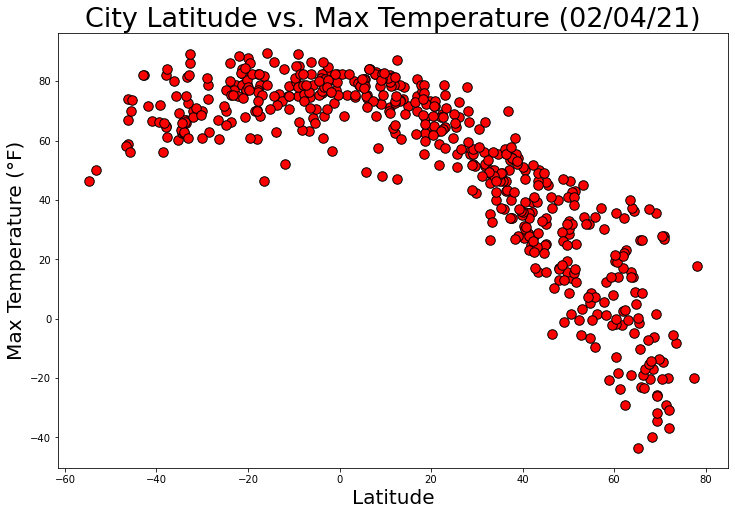

In [9]:
# create a scatter plot to show relationship between lattitude and max temperature
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o", s=90, c="r", edgecolor="k")

# add labels for readability
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"City Latitude vs. Max Temperature ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Max Temperature (°F)", fontsize=20)

# save figure as a .png file
plt.savefig("../output_data/Fig1.png")

plt.show()

### Analysis of Latitude vs. Max Temp Plot
- This graph shows the relationship between a city's latitude and their max temperature.
- The result shows what we all know and expect in that cities in the southern hemisphere and cities (both hemispheres) that are close to the equator have higher max temperatures than cities farther north of the equator.

## Latitude vs. Humidity Plot

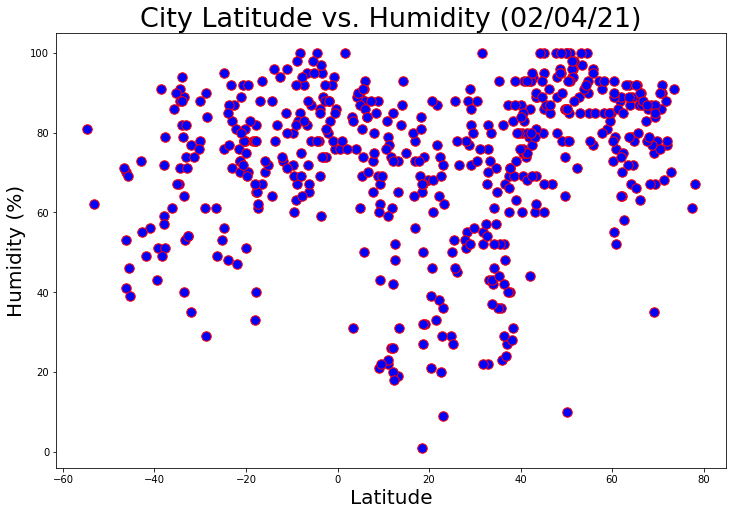

In [10]:
# create a scatter plot to show relationship between lattitude and humidity
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o", s=90, c="b", edgecolor="r")

# add labels for readability
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"City Latitude vs. Humidity ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Humidity (%)", fontsize=20)

# save figure as a .png file
plt.savefig("../output_data/Fig2.png")

plt.show()

### Analysis of Latitude vs. Humidity Plot
- This graph shows the relationship between a city's latitude and their humidity levels.

- The analysis of this graph does not give us a great definitive correlation between a city's latitude and their humidity levels.

- When I ran this last data set, there was a small cluster of cities between 10-40 degrees latitude that had lower humidity rates, however this was not the case in some of my previous data sets.

## Latitude vs. Cloudiness Plot

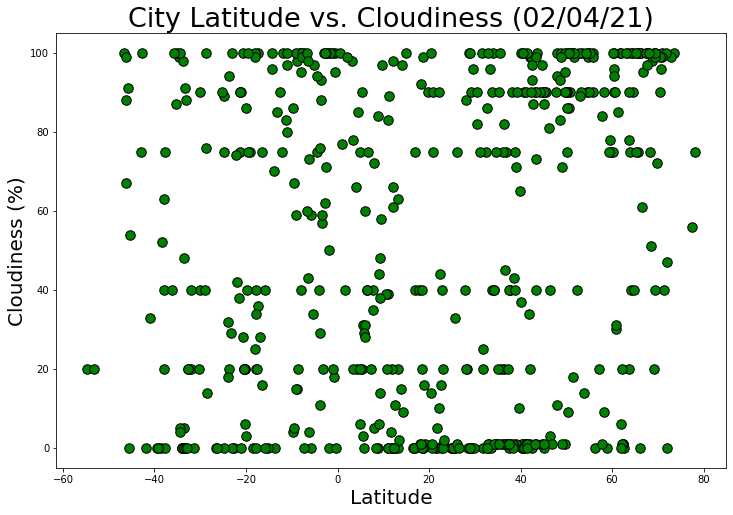

In [11]:
# create a scatter plot to show relationship between lattitude and cloudiness
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
fig1, ax1 = plt.subplots(figsize=(12, 8))

# add labels for readability
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o", s=90, c="g", edgecolor="k")
plt.title(f"City Latitude vs. Cloudiness ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Cloudiness (%)", fontsize=20)

# save figure as a .png file
plt.savefig("../output_data/Fig3.png")

plt.show()

### Analysis of Latitude vs. Cloudiness
- This graph shows the relationship between a city's latitude and their percentage of cloudy days.

- The results of this graph do not show any correlation between a city's latitude and how many cloudy days they have.

## Latitude vs. Wind Speed Plot

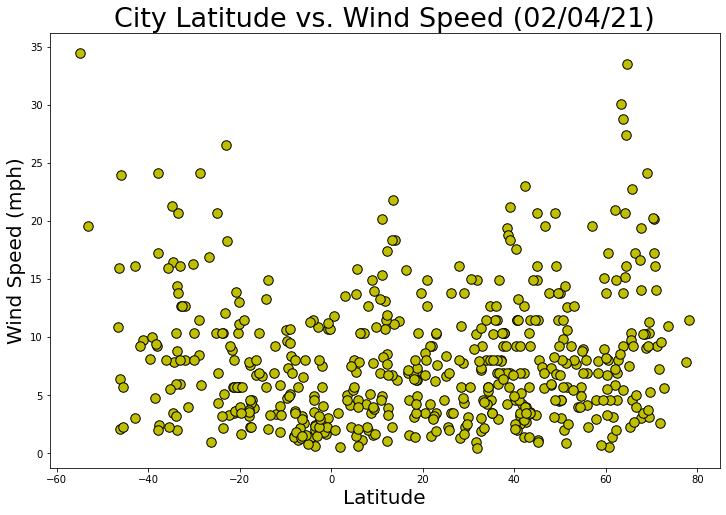

In [12]:
# create a scatter plot to show relationship between lattitude and wind speed
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
fig1, ax1 = plt.subplots(figsize=(12, 8))

# add labels for readability
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o", s=90, c="y", edgecolor="k")
plt.title(f"City Latitude vs. Wind Speed ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Wind Speed (mph)", fontsize=20)

# save figure as a .png file
plt.savefig("../output_data/Fig4.png")

plt.show()

### Analysis of Latitude vs. Wind Speed Plot
- This graph shows the relationship between a city's latitude and wind speeds.

- Looking at the graph, there does not seem to be a relationship between the city's latitude and wind speed.

## Linear Regression

In [13]:
# seperate data by northern and southern hemispheres
n_hem = cities_df.loc[cities_df["Lat"] >= 0]
s_hem = cities_df.loc[cities_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: round-0.8929091458115336


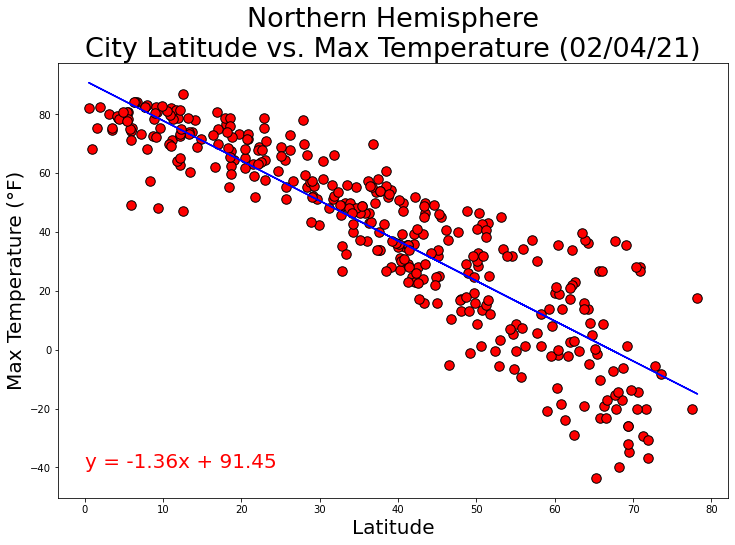

In [23]:
# create a scatter plot to show relationship between lattitude and max temp in the northern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = n_hem["Lat"]
y_value = n_hem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="r", edgecolor="k")

# plot regression line
plt.plot(x_value, regress_values, "b-")

# print equation in graph
plt.annotate(line_eq, (0,-40), fontsize=20, color="r")

# add labels for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Northern Hemisphere\nCity Latitude vs. Max Temperature ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Max Temperature (°F)", fontsize=20)

print(f"The r-value is: round{rvalue}")

# save figure as a .png file
plt.savefig("../output_data/LinRegress1.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.38373985056741927


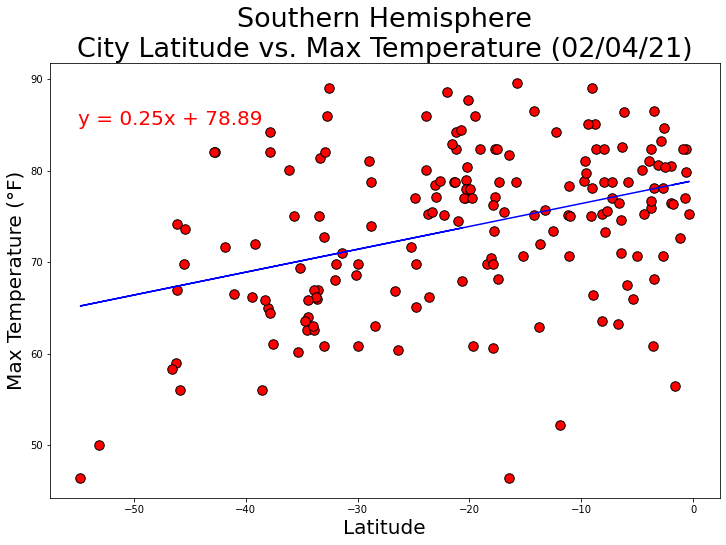

In [24]:
# create a scatter plot to show relationship between lattitude and max temp in the southern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = s_hem["Lat"]
y_value = s_hem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="r", edgecolor="k")

# plot regression line
plt.plot(x_value, regress_values, "b-")

# print equation in graph
plt.annotate(line_eq, (-55,85), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Southern Hemisphere\nCity Latitude vs. Max Temperature ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Max Temperature (°F)", fontsize=20)

print(f"The r-value is: {rvalue}")

# save figure as a .png file
plt.savefig("../output_data/LinRegress2.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.33959270472582703


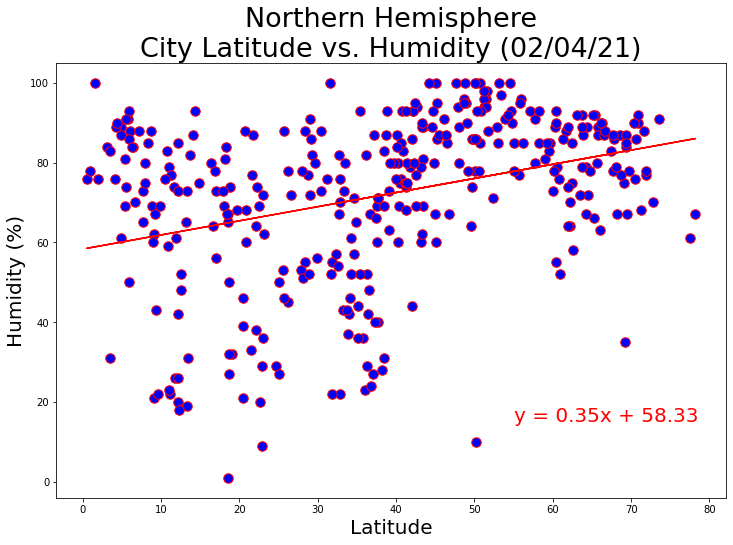

In [25]:
# create a scatter plot to show relationship between lattitude and humidity in the northern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = n_hem["Lat"]
y_value = n_hem["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="b", edgecolor="r")

# plot regression line
plt.plot(x_value, regress_values, "r-")

# print equation in graph
plt.annotate(line_eq, (55,15), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Northern Hemisphere\nCity Latitude vs. Humidity ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Humidity (%)", fontsize=20)

print(f"The r-value is: {rvalue}")

# save figure as a .png file
plt.savefig("../output_data/LinRegress3.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.43302018037491036


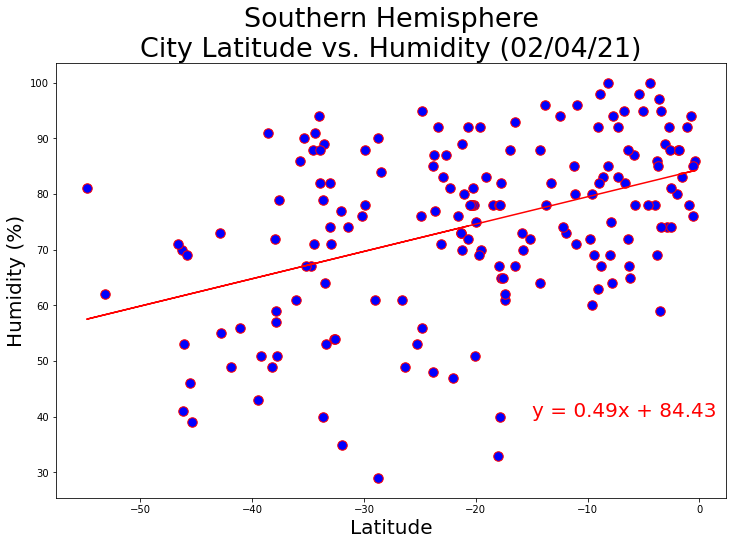

In [26]:
# create a scatter plot to show relationship between lattitude and humidity in the southern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = s_hem["Lat"]
y_value = s_hem["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="b", edgecolor="r")

# plot regression line
plt.plot(x_value, regress_values, "r-")

# print equation in graph
plt.annotate(line_eq, (-15,40), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Southern Hemisphere\nCity Latitude vs. Humidity ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Humidity (%)", fontsize=20)

print(f"The r-value is: {rvalue}")

# save figure as a .png file
plt.savefig("../output_data/LinRegress4.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.357987546903016


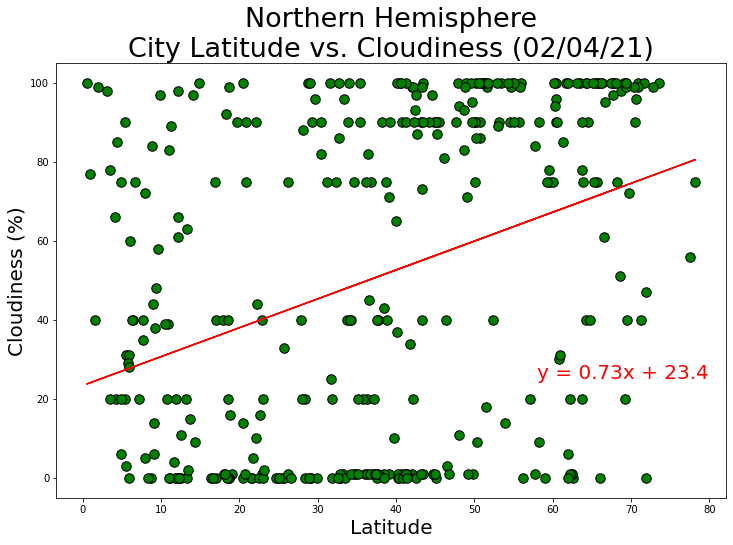

In [27]:
# create a scatter plot to show relationship between lattitude and cloudiness in the northern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = n_hem["Lat"]
y_value = n_hem["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="g", edgecolor="k")

# plot regression line
plt.plot(x_value, regress_values, "r-")

# print equation in graph
plt.annotate(line_eq, (58,25), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Northern Hemisphere\nCity Latitude vs. Cloudiness ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Cloudiness (%)", fontsize=20)

print(f"The r-value is: {rvalue}")

# save figure as a .png file
plt.savefig("../output_data/LinRegress5.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.18807913852559732


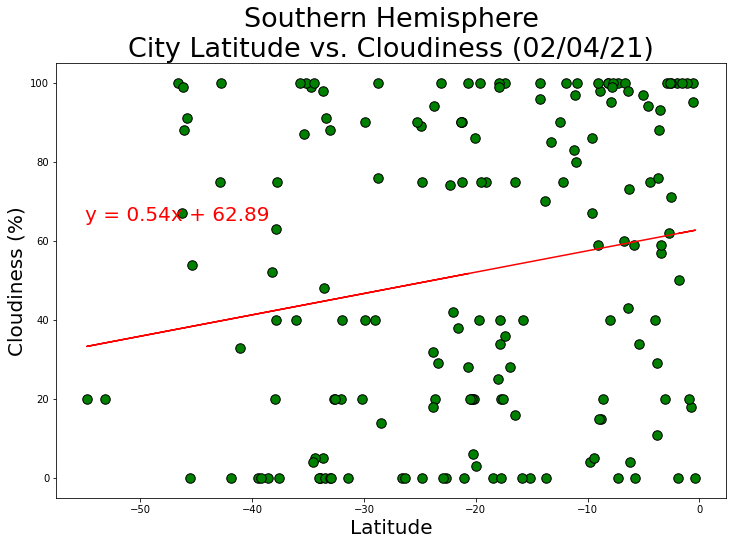

In [28]:
# create a scatter plot to show relationship between lattitude and cloudiness in the southern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = s_hem["Lat"]
y_value = s_hem["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="g", edgecolor="k")

# plot regression line
plt.plot(x_value, regress_values, "r-")

# print equation in graph
plt.annotate(line_eq, (-55,65), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Southern Hemisphere\nCity Latitude vs. Cloudiness ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Cloudiness (%)", fontsize=20)

print(f"The r-value is: {rvalue}")

# save figure as a .png file
plt.savefig("../output_data/LinRegress6.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.19196522930159077


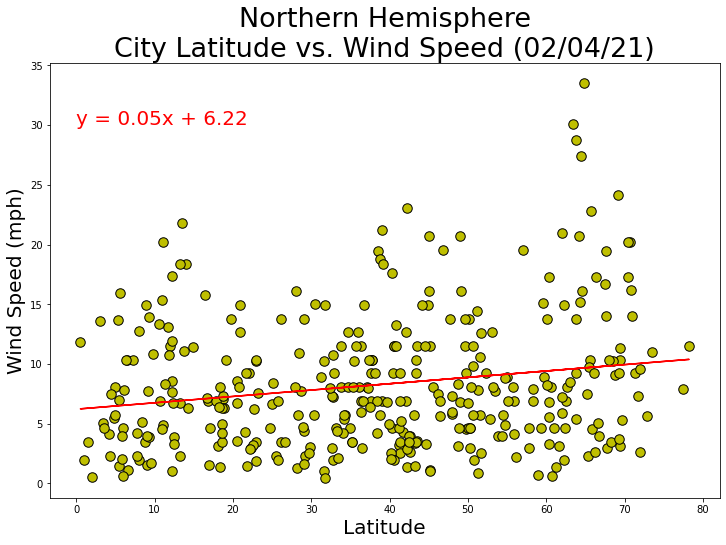

In [29]:
# create a scatter plot to show relationship between lattitude and wind speed in the northern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = n_hem["Lat"]
y_value = n_hem["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="y", edgecolor="k")

# plot regression line
plt.plot(x_value, regress_values, "r-")

# print equation in graph
plt.annotate(line_eq, (0,30), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Northern Hemisphere\nCity Latitude vs. Wind Speed ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Wind Speed (mph)", fontsize=20)

print(f"The r-value is: {rvalue}")

# save figure as a .png file
plt.savefig("../output_data/LinRegress7.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.4448898050080419


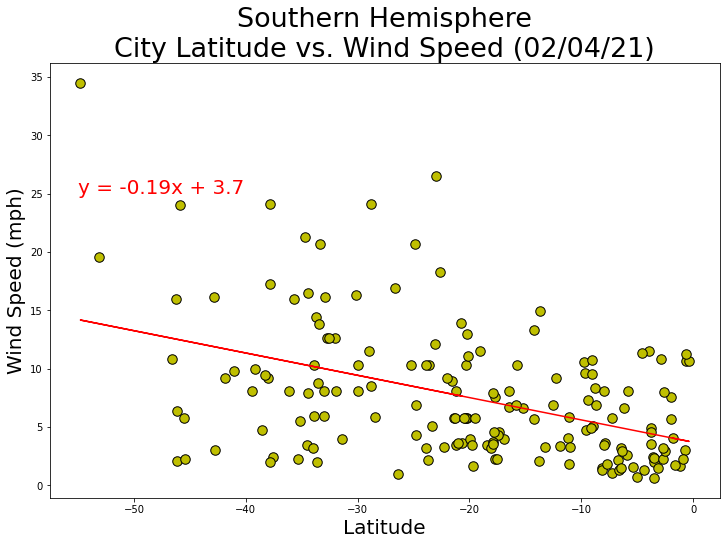

In [30]:
# create a scatter plot to show relationship between lattitude and wind speed in the southern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = s_hem["Lat"]
y_value = s_hem["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="y", edgecolor="k")

# plot regression line
plt.plot(x_value, regress_values, "r-")

# print equation in graph
plt.annotate(line_eq, (-55,25), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Southern Hemisphere\nCity Latitude vs. Wind Speed ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Wind Speed (mph)", fontsize=20)

print(f"The r-value is: {rvalue}")

# save figure as a .png file
plt.savefig("../output_data/LinRegress8.png")

plt.show()